In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
x=df.drop(columns=['id', 'Product ID', 'Machine failure'])
y=df[['Machine failure']]

In [9]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [11]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
con_pipe=Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                         ('scaler', StandardScaler())])

In [18]:
cat_pipe=Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                         ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [19]:
pre=ColumnTransformer([('con', con_pipe, con),
                       ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [21]:
x_pre=pre.fit_transform(x)
x_pre.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [23]:
xtrain.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
29391,-0.194806,0.620091,-0.225832,-0.017483,-0.506668,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
111006,0.073688,1.053251,0.372426,-0.546758,1.259929,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
16102,0.288483,0.475704,-0.658308,0.770549,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
110599,1.040265,0.764477,0.985100,-0.864323,0.228111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
84638,2.114241,2.280539,-0.506942,0.323605,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [24]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [25]:
xtest.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
22333,1.684651,1.702992,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
35216,1.953144,1.558605,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
112970,1.308759,0.836671,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
14905,0.664374,0.331317,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
25676,1.308759,1.269831,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0


In [26]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


In [27]:
xtrain.shape

(109143, 13)

In [29]:
xtest.shape

(27286, 13)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [32]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [33]:
train = []
test = []
train_cv = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate F1 score in train and test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Calcualte F1 5 fold cross validated score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append all above values in list
    train.append(f1_train)
    test.append(f1_test)
    train_cv.append(f1_cv)
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train F1 : {f1_train:.4f}')
    print(f'Test F1 : {f1_test:.4f}')
    print(f'Train F1 CV 5 Fold : {f1_cv:.4f}')
    print('\n==================================================\n')

Model Name : Logistic

Train F1 : 0.9318
Test F1 : 0.9260
Train F1 CV 5 Fold : 0.9310


Model Name : Decision Tree

Train F1 : 0.9978
Test F1 : 0.8753
Train F1 CV 5 Fold : 0.8747


Model Name : Random Forest

Train F1 : 0.9975
Test F1 : 0.9272
Train F1 CV 5 Fold : 0.9301


Model Name : Gradient Boost

Train F1 : 0.9358
Test F1 : 0.9255
Train F1 CV 5 Fold : 0.9285




In [34]:
results = {'name' : list(dct.keys()),
           'F1 Train': train,
           'F1 Test': test,
           'F1 Train CV': train_cv}

In [35]:
df_res = pd.DataFrame(results)
df_res

,name,F1 Train,F1 Test,F1 Train CV
0,Logistic,0.931790,0.926034,0.931022
1,Decision Tree,0.997775,0.875261,0.874675
2,Random Forest,0.997483,0.927182,0.930063
3,Gradient Boost,0.935762,0.925459,0.928527


In [36]:
df_res.sort_values(by='F1 Train CV', ascending=False)

,name,F1 Train,F1 Test,F1 Train CV
0,Logistic,0.931790,0.926034,0.931022
2,Random Forest,0.997483,0.927182,0.930063
3,Gradient Boost,0.935762,0.925459,0.928527
1,Decision Tree,0.997775,0.875261,0.874675


In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [38]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [43]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [41]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [40]:
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [42]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


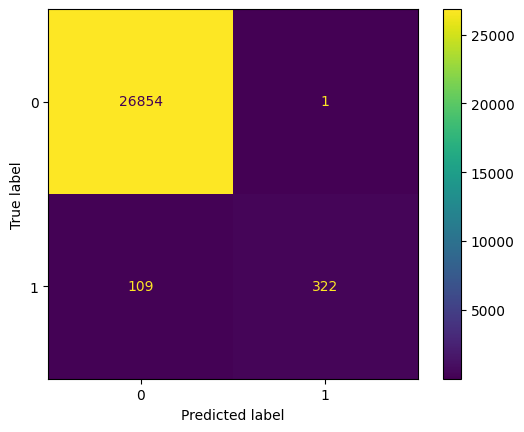

In [45]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       1.00      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       1.00      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([0.91437953, 0.92323611, 0.9311145 , 0.94273511, 0.94364277])

In [49]:
scores.mean()

0.9310216042899387

In [51]:
yprob_train = model.predict_proba(xtrain)
yprob_test = model.predict_proba(xtest)

In [53]:
model.classes_

array([0, 1], dtype=int64)

In [54]:

yprob_train[0:5]

array([[0.99855586, 0.00144414],
       [0.99831446, 0.00168554],
       [0.99391485, 0.00608515],
       [0.99805342, 0.00194658],
       [0.99589362, 0.00410638]])

In [55]:

ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [56]:

yprob_test[0:5]

array([[0.99804524, 0.00195476],
       [0.99781659, 0.00218341],
       [0.9792439 , 0.0207561 ],
       [0.99723209, 0.00276791],
       [0.99833295, 0.00166705]])

In [57]:
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [60]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre.head()

,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.313830,1.126570,-0.153806,-0.274579,-0.693494,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
1,0.990824,0.765635,1.375097,-1.356341,-1.366729,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
2,0.775487,0.332512,0.031949,-0.309854,-0.129855,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
3,0.129475,-0.244985,-0.296694,0.854217,-1.554608,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,0.0,1.0
4,1.906008,1.704068,-0.039496,0.113445,0.151964,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,0.0,1.0


In [61]:
preds=model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
probs = model.predict_proba(xnew_pre)
probs

array([[0.99762647, 0.00237353],
       [0.99870037, 0.00129963],
       [0.99712425, 0.00287575],
       ...,
       [0.99697268, 0.00302732],
       [0.99727169, 0.00272831],
       [0.99759026, 0.00240974]])

In [64]:
import numpy as np 
max_prob = np.max(probs, axis=1)
max_prob

array([0.99762647, 0.99870037, 0.99712425, ..., 0.99697268, 0.99727169,
       0.99759026])

In [65]:
xnew['Machine failure'] = preds 
xnew['Probability'] = max_prob


In [66]:
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure,Probability
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,0.997626
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,0.998700
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,0.997124
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0.996552
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0.996280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,0,0.997381
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,0,0.999464
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,0,0.996973
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0,0,0.997272


In [67]:
a = xnew[['id', 'Machine failure', 'Probability']]
a.head(10)

,id,Machine failure,Probability
0,136429,0,0.997626
1,136430,0,0.998700
2,136431,0,0.997124
3,136432,0,0.996552
4,136433,0,0.996280
5,136434,0,0.997110
6,136435,0,0.996284
7,136436,0,0.994681
8,136437,0,0.998805
9,136438,0,0.998718


In [68]:
res=a

In [69]:
res.to_csv('result.csv', index=False)